In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

In [2]:
RAND_STATE = 34 # for reproducible shuffling
TT_RATIO = 0.3 # test/train

In [3]:
from scipy.stats import iqr
def remove_outliers(df):
    for c in df.columns:
            pct_75 = np.percentile(df[c], 75)
            pct_25 = np.percentile(df[c], 25)
            upper_bound = pct_75 + 1.5*iqr(df[c])
            lower_bound = pct_25 - 1.5*iqr(df[c])
            condition = (df[c] < upper_bound) & (df[c] > lower_bound)
            df[c] = df[c][condition]  # Filter out the outliers
    return df

In [4]:
hk_df= pd.read_csv('TA_restaurants_curated.csv')

In [32]:
na_idcs = hk_df[hk_df.isna().any(axis=1)].index
hk_df = pd.DataFrame(hk_df).drop(na_idcs)
hk_df


,Unnamed: 0,Name,City,Cuisine Style,Ranking,Rating,price_range,Number of Reviews,Reviews,URL_TA,ID_TA
0,0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,$$ - $$$,136.0,"[['Just like home', 'A Warm Welcome to Wintry ...",/Restaurant_Review-g188590-d11752080-Reviews-M...,d11752080
1,1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,$$$$,812.0,"[['Great food and staff', 'just perfect'], ['0...",/Restaurant_Review-g188590-d693419-Reviews-De_...,d693419
2,2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,$$$$,567.0,"[['Satisfaction', 'Delicious old school restau...",/Restaurant_Review-g188590-d696959-Reviews-La_...,d696959
3,3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,$$$$,564.0,"[['True five star dinner', 'A superb evening o...",/Restaurant_Review-g188590-d1239229-Reviews-Vi...,d1239229
4,4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,$$$$,316.0,"[['Best meal.... EVER', 'super food experience...",/Restaurant_Review-g188590-d6864170-Reviews-Li...,d6864170
...,...,...,...,...,...,...,...,...,...,...,...
125423,1563,Taj Palace,Zurich,"['Indian', 'Asian', 'Vegetarian Friendly', 'Ha...",1569.0,2.5,$$ - $$$,53.0,"[['Good food and nice experience', 'Disappoint...",/Restaurant_Review-g188113-d697907-Reviews-Taj...,d697907
125434,1574,Forum,Zurich,"['Mediterranean', 'European', 'Central Europea...",1580.0,3.5,$$ - $$$,104.0,"[['Good service', 'nice atmoshphere'], ['06/27...",/Restaurant_Review-g188113-d1187556-Reviews-Fo...,d1187556
125435,1575,PurPur,Zurich,['Bar'],1581.0,2.0,$$ - $$$,150.0,"[['Worst New Year’s Eve experience', 'HORRIBLE...",/Restaurant_Review-g188113-d939089-Reviews-Pur...,d939089
125438,1578,Jade,Zurich,"['Chinese', 'Swiss', 'Mediterranean', 'European']",1584.0,3.0,$$$$,21.0,"[['Horrible!', 'It was really horrible, I woul...",/Restaurant_Review-g188113-d1551957-Reviews-Ja...,d1551957


In [37]:
hk_df.price_range.unique()


array(['$$ - $$$', '$$$$', '$'], dtype=object)

In [40]:
from sklearn import preprocessing


In [45]:
le = preprocessing.LabelEncoder()
le.fit(['$','$$ - $$$', '$$$$'])


LabelEncoder()

In [46]:
le.transform(hk_df.price_range)

array([1, 2, 2, ..., 1, 2, 1])

In [ ]:
>>> list(le.classes_)
['$$ - $$$', '$$$$', '$']
>>> le.transform(['$$ - $$$', '$$$$', '$'])
array([1, 2, 3, 0]...)
>>> list(le.inverse_transform([1, 2, 3, 0]))
['$$ - $$$', '$$$$', '$']

In [47]:
le.transform(hk_df.price_range)

0         $$ - $$$
1             $$$$
2             $$$$
3             $$$$
4             $$$$
            ...   
125423    $$ - $$$
125434    $$ - $$$
125435    $$ - $$$
125438        $$$$
125445    $$ - $$$
Name: price_range, Length: 74225, dtype: object

In [50]:
hk_df['PR']=le.transform(hk_df.price_range)


In [53]:
hk_df

,Unnamed: 0,Name,City,Cuisine Style,Ranking,Rating,price_range,Number of Reviews,Reviews,URL_TA,ID_TA,PR
0,0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,$$ - $$$,136.0,"[['Just like home', 'A Warm Welcome to Wintry ...",/Restaurant_Review-g188590-d11752080-Reviews-M...,d11752080,1
1,1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,$$$$,812.0,"[['Great food and staff', 'just perfect'], ['0...",/Restaurant_Review-g188590-d693419-Reviews-De_...,d693419,2
2,2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,$$$$,567.0,"[['Satisfaction', 'Delicious old school restau...",/Restaurant_Review-g188590-d696959-Reviews-La_...,d696959,2
3,3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,$$$$,564.0,"[['True five star dinner', 'A superb evening o...",/Restaurant_Review-g188590-d1239229-Reviews-Vi...,d1239229,2
4,4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,$$$$,316.0,"[['Best meal.... EVER', 'super food experience...",/Restaurant_Review-g188590-d6864170-Reviews-Li...,d6864170,2
...,...,...,...,...,...,...,...,...,...,...,...,...
125423,1563,Taj Palace,Zurich,"['Indian', 'Asian', 'Vegetarian Friendly', 'Ha...",1569.0,2.5,$$ - $$$,53.0,"[['Good food and nice experience', 'Disappoint...",/Restaurant_Review-g188113-d697907-Reviews-Taj...,d697907,1
125434,1574,Forum,Zurich,"['Mediterranean', 'European', 'Central Europea...",1580.0,3.5,$$ - $$$,104.0,"[['Good service', 'nice atmoshphere'], ['06/27...",/Restaurant_Review-g188113-d1187556-Reviews-Fo...,d1187556,1
125435,1575,PurPur,Zurich,['Bar'],1581.0,2.0,$$ - $$$,150.0,"[['Worst New Year’s Eve experience', 'HORRIBLE...",/Restaurant_Review-g188113-d939089-Reviews-Pur...,d939089,1
125438,1578,Jade,Zurich,"['Chinese', 'Swiss', 'Mediterranean', 'European']",1584.0,3.0,$$$$,21.0,"[['Horrible!', 'It was really horrible, I woul...",/Restaurant_Review-g188113-d1551957-Reviews-Ja...,d1551957,2


C:\Users\aguil\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PR', ylabel='Density'>

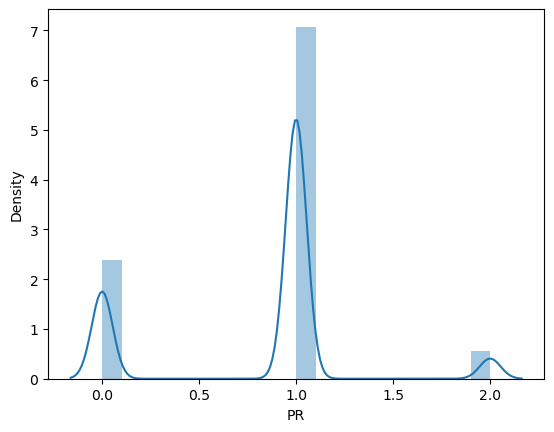

In [54]:
sns.distplot((hk_df['PR']), bins=20)

In [60]:
hk_df['PR'].value_counts()


1    52509
0    17641
2     4075
Name: PR, dtype: int64

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'Ranking'}>],
       [<AxesSubplot:title={'center':'Rating'}>,
        <AxesSubplot:title={'center':'Number of Reviews'}>],
       [<AxesSubplot:title={'center':'PR'}>, <AxesSubplot:>]],
      dtype=object)

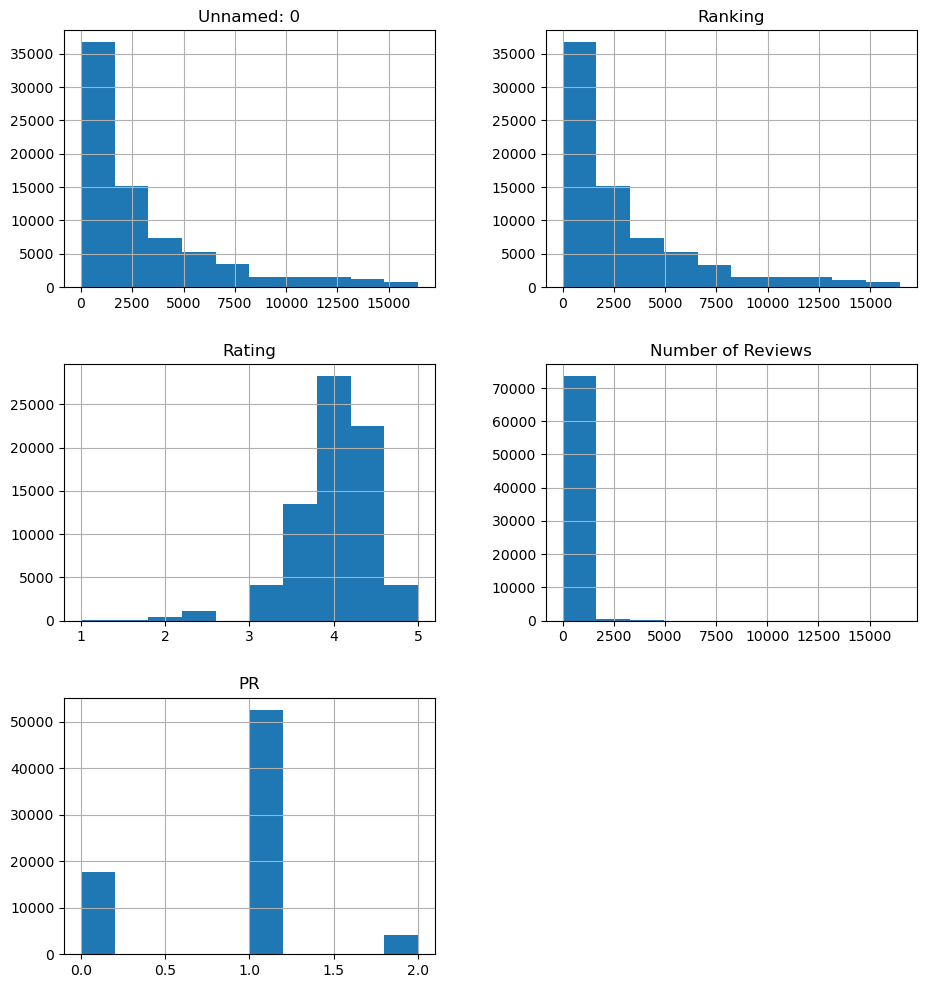

In [61]:
hk_df.hist(figsize=(11,12))

C:\Users\aguil\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Ranking', ylabel='Density'>

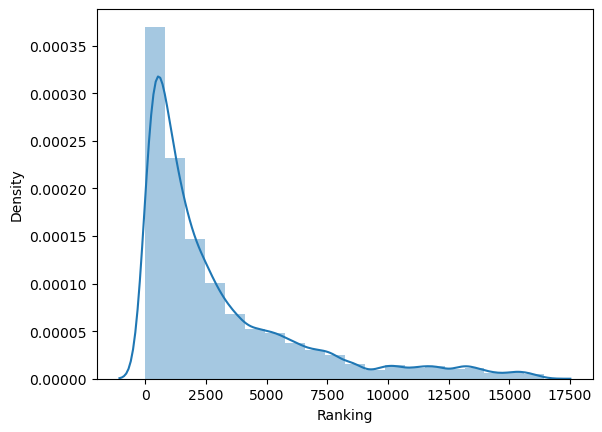

In [62]:
sns.distplot((hk_df['Ranking']), bins=20)